<a href="https://colab.research.google.com/github/KernAlexandr/KernAlexandr/blob/main/Practical%20work%20%E2%84%961%20task%20%E2%84%961%20'News%20filtering%20(REAL%2CFAKE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая работа 1

Задание 1

Шаг 1: Импорт необходимой библиотеки

Шаг 2: Загрузка набора данных

Шаг 3: Исследование набора данных

Шаг 4: Проверка на наличие нулевых значений или отсутствующих значений

Шаг 5: Построение графика набора данных
Поскольку мы не можем построить текстовые данные, мы построим столбчатую
диаграмму количества поддельных и реальных

Шаг 6: Разделение данных на обучение и тестирование
Здесь мы опустим безымянный 0 и заголовок новости

Шаг 7: Инициализация TfidVectorizer

Шаг 8: Подгонка и преобразование обучающих и тестовых данных

Шаг 9: Инициализация PassiveAggressiveClassifier

Шаг 10: Прогнозирование на основе тестовых данных

Шаг 11: Поиск точности

Шаг 12: Создание матрицы ошибок

Шаг 13: Прогнозирование с использованием новых данных (не из набора данных)

In [ ]:
#Импортируем необходимые библиотеки
import pandas as pd

from sklearn.model_selection import train_test_split # создает наборы данных для обучения и тестирования модели
from sklearn.feature_extraction.text import TfidfVectorizer # преобразует текстовые данные в числовые векторы, используя метод TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.linear_model import PassiveAggressiveClassifier # Пассивно-агрессивный классификатор
from sklearn.metrics import accuracy_score # вычисляет точность модели
from sklearn.metrics import confusion_matrix # для построения матриц ошибок
from sklearn.metrics import precision_score # Метрика (Точность)
from sklearn.metrics import recall_score # Метрика (Полнота)
from sklearn.metrics import f1_score # Метрика (F1 мера)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Загружаем датасет из задания
df_news = pd.read_csv('/content/drive/MyDrive/fake_news.csv')

In [ ]:
#Исследуем дата фрейм
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
#Смотрим голову
df_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#Смотрим хвост
df_news.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [ ]:
#Смотрим количество: нулевые или пустые значения
df_news.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [ ]:
#Посмотрим повторяющиеся новости
df_news.text.value_counts()

text
Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
#проанализируем новости без содержания
result = df_news[df_news['text'] == ' ']
result.head(100)

,Unnamed: 0,title,text,label
106,5530,The Arcturian Group by Marilyn Raffaele Octobe...,,FAKE
710,8332,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,FAKE
806,9314,Southern Poverty Law Center Targets Anti-Jihad...,,FAKE
919,10304,Refugee Resettlement Watch: Swept Away In Nort...,,FAKE
940,9474,Michael Bloomberg Names Technological Unemploy...,,FAKE
1664,5802,Alert News : Putins Army Is Coming For World W...,,FAKE
1736,9564,An LDS Reader Takes A Look At Trump Accuser Je...,,FAKE
1851,5752,America’s Senator Jeff Sessions Warns of Worse...,,FAKE
1883,8816,Paris Migrant Campers Increase after Calais Is...,,FAKE
1941,7525,Putins Army is coming for World war 3 against ...,,FAKE


Из данного дата сета можно сделать вывод ,Если новость имеет только заголовок, она является фейком

In [ ]:
#поглядим, что у нас по повторяющимся строкам, в которых повторяются 'title', 'text', 'label'
duplicates_mask = df_news.duplicated(subset=['title', 'text', 'label'], keep = False) #keep = False помечает все дубли
df_news_duplicated = df_news[duplicates_mask]
df_news_duplicated.info()
df_news_duplicated.head(60)

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 25 to 6233
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57 non-null     int64 
 1   title       57 non-null     object
 2   text        57 non-null     object
 3   label       57 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


,Unnamed: 0,title,text,label
25,636,Anti-Trump forces seek last-ditch delegate revolt,Washington (CNN) The faction of the GOP that i...,REAL
66,4410,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,REAL
345,739,"Do Democrats Want What Bernie Wants, Or Just W...","Do Democrats Want What Bernie Wants, Or Just W...",REAL
584,9652,Hillary’s “Big Tent” is Obama’s “Grand Bargain...,2016 presidential campaign by BAR executive ed...,FAKE
863,2905,US faces calls to ‘walk away’ from Iran talks,A leading Republican critic of the Iranian nuc...,REAL
923,2237,"University of Missouri, please immediately fir...",To watch the video of photographer Tim Tai get...,REAL
1155,6632,"Black Agenda Radio for Week of Nov. 7, 2016","News, information and analysis from the black ...",FAKE
1210,4096,There’s a good reason protesters at the Univer...,Video of a confrontation between a news photog...,REAL
1241,666,Donald Trump is blatantly racist — and the med...,"Donald Trump, the actual Republican candidate ...",REAL
1343,8391,North Korea Threatens ‘Sacred’ Nuclear War Aga...,Email \nNorth Korea’s Foreign Ministry slammed...,FAKE


Видим что повторяется 57 строк с новостями. столбец 'Unammed: 0' не учитывал

In [ ]:
#удалим повторяющиеся строки по полям столбцам 'title', 'text', 'label'
df_news_unique = df_news.drop_duplicates(subset=['title', 'text', 'label'])

In [ ]:
df_news_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6306 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6306 non-null   int64 
 1   title       6306 non-null   object
 2   text        6306 non-null   object
 3   label       6306 non-null   object
dtypes: int64(1), object(3)
memory usage: 246.3+ KB


In [ ]:
#удалим столбец 'Unnamed: 0'
df_news_unique = df_news_unique.drop('Unnamed: 0', axis=1)

In [ ]:
df_news_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6306 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6306 non-null   object
 1   text    6306 non-null   object
 2   label   6306 non-null   object
dtypes: object(3)
memory usage: 197.1+ KB


In [ ]:
#Посчитаем колличество фейковых и реальных новостей
df_news_unique.label.value_counts()

,count
label,
REAL,3154
FAKE,3152


In [ ]:
# создадим дата фрейм с подсчетом фейковых и реальных новостей
df_label = df_news_unique.label.value_counts()
df_label.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, REAL to FAKE
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


<Axes: title={'center': 'Отношение реальных новостей к фейковымв датасете'}, ylabel='Количество'>

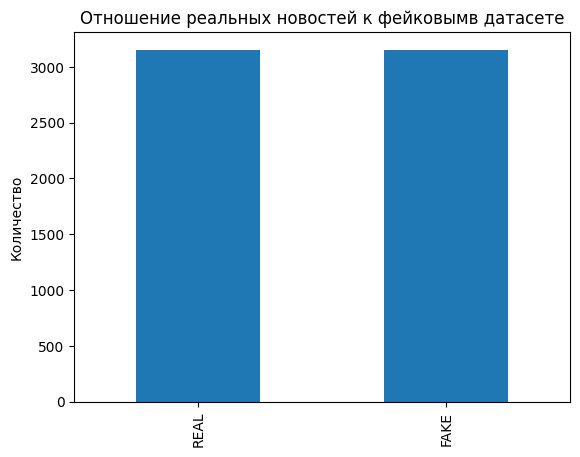

In [ ]:
# Построим график для наглядности
df_label.plot.bar(
    title='Отношение реальных новостей к фейковымв датасете',
    xlabel='',
    ylabel='Количество',
)

Делаем вывод, что в отформатированном датасете колличество реальных и фейковых новостей практически равно 3154 против 3152

In [ ]:
#создадим набор данных для обучения
X_train, X_test, y_train, y_test = train_test_split(df_news_unique['text'], df_news_unique['label'], test_size = 0.2, random_state = 9)

In [ ]:
#посмотрим равномерность распределения данных (баланс классов)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5044,) (1262,)
(5044,) (1262,)


In [ ]:
# Инициализируем TfidfVectorizer . настраиваем параметры векторизации текста
vectorizer = TfidfVectorizer(max_df = 0.7)

Как работает TF-IDF:
Формула TF-IDF для слова t в документе d:

**TF-IDF(t,d)=TF(t,d)×IDF(t)**

**TF (Term Frequency)** — частота слова в документе (чем чаще слово встречается в тексте, тем выше вес).

**IDF (Inverse Document Frequency)** — обратная частота документа (чем реже слово встречается во всех документах, тем выше его важность).

In [ ]:
#Преобразуем с помощью TfidfVectorizer обучающие и тестовые данные в матрицу объектов TF-IDF.
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [ ]:
# Обучаем модель с помощью Пассивно-агрессивного классификатора + параметры модели
model = PassiveAggressiveClassifier(C = 0.1, max_iter = 50) #обьявляем модель с Пассивно-агрессивным классификатором
model.fit(tfidf_train, y_train) #обучаем модель на тренировочных данных

PassiveAggressiveClassifier(C=0.1, max_iter=50)

In [ ]:
# Смотрим что предскажет наша, обученная модель, используя тестовые данные
y_pred = model.predict(tfidf_test)

In [ ]:
# Определим точность предсказания новости (FAKE/REAL) предсказанной классификации по отношению к тестовой выборке
accuracy = accuracy_score(y_test,y_pred)
print(f'Точность обученности модели составляет: {accuracy*100:.2f}%')

Точность обученности модели составляет: 93.98%


In [ ]:
#Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
print(cm)

[[588  35]
 [ 41 598]]


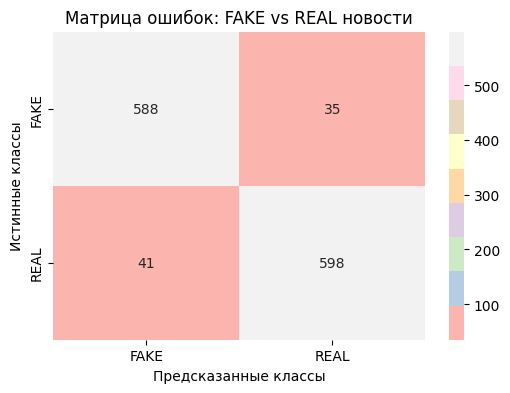

In [ ]:
#Визуализируем матрицу ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Pastel1",
    xticklabels=["FAKE", "REAL"],
    yticklabels=["FAKE", "REAL"]
    )
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.title("Матрица ошибок: FAKE vs REAL новости")
plt.show()

Из матрицы ошибок мы видим, что фейковые новости принятые за реальные составляют:

36/587*100 = 6%

(это, наверное, самый важный показатель нашей модели), чем он меньше тем лучше.

In [ ]:
#Придумаем новость и проверим фейковая она или реальная + возьмем реальную новость из интернета для проверки
fake_news_test = ["In a purr-fectly unexpected turn of events, a fluffy orange tabby named Whiskers has been elected honorary mayor of the sleepy town of Pawsville. Residents claim he won by a landslide after a campaign based on promises of mandatory nap breaks, free tuna buffets, and a zero-tolerance policy for vacuum cleaners. Town officials admit they just really like cats."]
real_news_test = ['This is a really important question, Lambert says. “I don’t want to be passed along to two or three people,” she says. “I want one person to contact.” There may be specific contact points for different areas, she adds, such as the director of nursing for related questions. However, “I want to know that I can pop into the executive director’s office anytime, ask any question and make any kind of complaint,” she emphasizes. “I want to know that person is available. Because sometimes, you have to go up to that level.""']

# превратим в матрицу
tfidf_test1 = vectorizer.transform(fake_news_test)
tfidf_test2 = vectorizer.transform(real_news_test)

# Смотрим что предскажет наша модель, используя новости не из дата сета
y_pred1 = model.predict(tfidf_test1)
y_pred2 = model.predict(tfidf_test2)

print(f'Эта новость должна быть фейковой {y_pred1}, а эта новость реальной {y_pred2}')


Эта новость должна быть фейковой ['FAKE'], а эта новость реальной ['REAL']
